In [1]:
# Heart Attack Risk Prediction - Task 01
# TeamCode: EM12
# TeamName: Alpha Minds

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier



In [3]:
import pandas as pd

# Load training and test data
train = pd.read_csv('/Heart_Attack_training_dataset.csv')
test = pd.read_csv('/Hear_Attack_evaluation_dataset.csv')

# Display basic info
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

train.head()


Train dataset shape: (7963, 26)
Test dataset shape: (800, 25)


,patient_id,age,sex,chol,bp,hr,diabetes,family_history,smoking,obesity,...,sedentary_hr,income,bmi,triglycerides,phys_act_days,sleep_hr,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
# Split 'bp' into two numeric columns
train[['systolic_bp', 'diastolic_bp']] = train['bp'].str.split('/', expand=True).astype(float)
test[['systolic_bp', 'diastolic_bp']] = test['bp'].str.split('/', expand=True).astype(float)

# Drop the original 'bp' column
train.drop('bp', axis=1, inplace=True)
test.drop('bp', axis=1, inplace=True)


In [5]:
# Check for missing values in the training dataset
print("Missing values in Training Dataset:")
print(train.isnull().sum())

print("\nMissing values in Test Dataset:")
print(test.isnull().sum())


Missing values in Training Dataset:
patient_id           0
age                  0
sex                  0
chol                 0
hr                   0
diabetes             0
family_history       0
smoking              0
obesity              0
alcohol              0
exercise_hr_wk       0
diet                 0
prev_heart_prob      0
med_use              0
stress_lvl           0
sedentary_hr         0
income               0
bmi                  0
triglycerides        0
phys_act_days        0
sleep_hr             0
country              0
continent            0
hemisphere           0
heart_attack_risk    0
systolic_bp          0
diastolic_bp         0
dtype: int64

Missing values in Test Dataset:
patient_id         0
age                0
sex                0
chol               0
hr                 0
diabetes           0
family_history     0
smoking            0
obesity            0
alcohol            0
exercise_hr_wk     0
diet               0
prev_heart_prob    0
med_use            0
str

In [6]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = ['sex', 'diet', 'country', 'continent', 'hemisphere']

le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


In [7]:
from sklearn.preprocessing import StandardScaler

# Drop patient_id and target from training features
X = train.drop(['patient_id', 'heart_attack_risk'], axis=1)
y = train['heart_attack_risk']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare test features
X_test = test.drop(['patient_id'], axis=1)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (6370, 25)
Validation set shape: (1593, 25)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42,
    class_weight='balanced' # helps improve recall for minority class
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on validation set
y_val_pred = rf_model.predict(X_val)


Model Evaluation Metrics on Validation Set:

Accuracy: 0.653
Precision: 0.300
Recall: 0.005
F1 Score: 0.011
ROC-AUC Score: 0.499


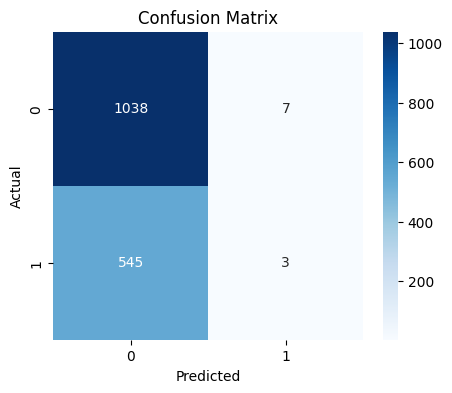

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Accuracy
acc = accuracy_score(y_val, y_val_pred)

# Precision
prec = precision_score(y_val, y_val_pred)

# Recall (most important for this task)
rec = recall_score(y_val, y_val_pred)

# F1-score
f1 = f1_score(y_val, y_val_pred)

# ROC-AUC Score
roc = roc_auc_score(y_val, y_val_pred)

print("Model Evaluation Metrics on Validation Set:\n")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc:.3f}")

# Optional: Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
!pip install imbalanced-learn --quiet

from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Original training set size:", X_train.shape, y_train.value_counts())
print("Resampled training set size:", X_train_res.shape, pd.Series(y_train_res).value_counts())


Original training set size: (6370, 25) heart_attack_risk
0    4179
1    2191
Name: count, dtype: int64
Resampled training set size: (8358, 25) heart_attack_risk
0    4179
1    4179
Name: count, dtype: int64


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model again
rf_model_res = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Train on resampled data
rf_model_res.fit(X_train_res, y_train_res)

# Predict on validation set
y_val_pred_res = rf_model_res.predict(X_val)


Model Evaluation Metrics on Validation Set (After SMOTE):

Accuracy: 0.627
Precision: 0.338
Recall: 0.088
F1 Score: 0.139
ROC-AUC Score: 0.499


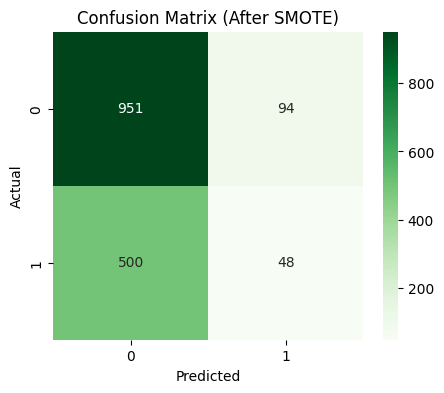

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


acc = accuracy_score(y_val, y_val_pred_res)
prec = precision_score(y_val, y_val_pred_res)
rec = recall_score(y_val, y_val_pred_res)
f1 = f1_score(y_val, y_val_pred_res)
roc = roc_auc_score(y_val, y_val_pred_res)


print("Model Evaluation Metrics on Validation Set (After SMOTE):\n")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc:.3f}")


cm = confusion_matrix(y_val, y_val_pred_res)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After SMOTE)')
plt.show()


In [14]:
!pip install xgboost --quiet
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    objective='binary:logistic',
    scale_pos_weight=1,  # balanced by SMOTE
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train_res, y_train_res)

# Predict probabilities on validation set
y_val_proba = xgb_model.predict_proba(X_val)[:,1]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:58:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
# Set threshold for positive class
threshold = 0.3
y_val_pred_thresh = (y_val_proba > threshold).astype(int)


XGBoost Metrics on Validation Set (Threshold 0.3):

Accuracy: 0.417
Precision: 0.338
Recall: 0.723
F1 Score: 0.460
ROC-AUC Score: 0.490


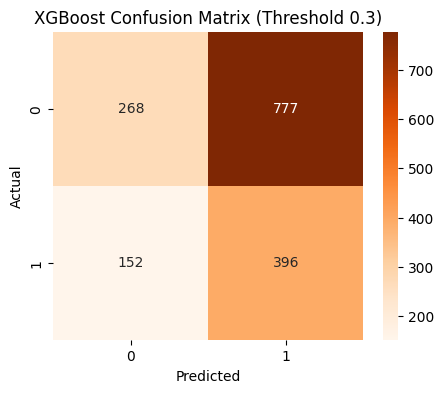

In [16]:
# Metrics
acc = accuracy_score(y_val, y_val_pred_thresh)
prec = precision_score(y_val, y_val_pred_thresh)
rec = recall_score(y_val, y_val_pred_thresh)
f1 = f1_score(y_val, y_val_pred_thresh)
roc = roc_auc_score(y_val, y_val_pred_thresh)

print("XGBoost Metrics on Validation Set (Threshold 0.3):\n")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred_thresh)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix (Threshold 0.3)')
plt.show()


In [17]:
!pip install xgboost lightgbm imbalanced-learn --quiet

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)

# XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_res, y_train_res)

# LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)
lgb_model.fit(X_train_res, y_train_res)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:01:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 4179, number of negative: 4179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5679
[LightGBM] [Info] Number of data points in the train set: 8358, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

LGBMClassifier(learning_rate=0.05, max_depth=6, n_estimators=300,
               random_state=42)

In [19]:
# Get probabilities for validation set
rf_proba = rf_model.predict_proba(X_val)[:,1]
xgb_proba = xgb_model.predict_proba(X_val)[:,1]
lgb_proba = lgb_model.predict_proba(X_val)[:,1]

# Average probabilities
ensemble_proba = (rf_proba + xgb_proba + lgb_proba) / 3

# Apply threshold to maximize Recall
threshold = 0.3
y_val_pred_ensemble = (ensemble_proba > threshold).astype(int)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [20]:
# Ensure X_test has same columns as training
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_res.columns)

# Use this for prediction
lgb_test_proba = lgb_model.predict_proba(X_test_scaled_df)[:,1]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [21]:
# Save feature columns before resampling
feature_cols = X_train.columns  # X_train BEFORE SMOTE


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [22]:
# Define feature columns from the original DataFrame
feature_cols = train.drop(columns=['patient_id','heart_attack_risk']).columns

# Convert X_test_scaled to DataFrame with these columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols)


Ensemble Model Metrics on Validation Set (Threshold 0.3):

Accuracy: 0.379
Precision: 0.345
Recall: 0.894
F1 Score: 0.497
ROC-AUC Score: 0.501


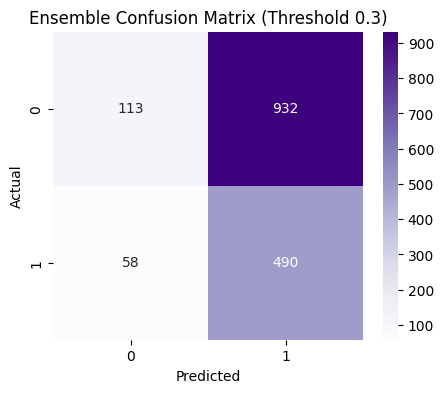

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
acc = accuracy_score(y_val, y_val_pred_ensemble)
prec = precision_score(y_val, y_val_pred_ensemble)
rec = recall_score(y_val, y_val_pred_ensemble)
f1 = f1_score(y_val, y_val_pred_ensemble)
roc = roc_auc_score(y_val, y_val_pred_ensemble)

print("Ensemble Model Metrics on Validation Set (Threshold 0.3):\n")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred_ensemble)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Confusion Matrix (Threshold 0.3)')
plt.show()


In [24]:

rf_proba_test = rf_model.predict_proba(X_test)[:,1]
xgb_proba_test = xgb_model.predict_proba(X_test)[:,1]
lgb_proba_test = lgb_model.predict_proba(X_test)[:,1]

# Ensemble: average probabilities
ensemble_proba_test = (rf_proba_test + xgb_proba_test + lgb_proba_test) / 3


threshold = 0.3
y_test_pred_ensemble = (ensemble_proba_test > threshold).astype(int)

submission_df = pd.DataFrame({
    'patient_id': test_df['patient_id'],
    'heart_attack_risk': y_test_pred_ensemble
})


submission_df.to_csv('EM12_Alpha_Minds_Task1_Predictions.csv', index=False)

print("Submission CSV saved successfully!")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


NameError: name 'test_df' is not defined

In [25]:
# Prepare test features (drop patient_id)
X_test = test.drop(columns=['patient_id']).values  # convert to NumPy

# Predict probabilities with all models
rf_proba_test = rf_model.predict_proba(X_test)[:,1]
xgb_proba_test = xgb_model.predict_proba(X_test)[:,1]
lgb_proba_test = lgb_model.predict_proba(X_test)[:,1]

# Ensemble average
ensemble_proba_test = (rf_proba_test + xgb_proba_test + lgb_proba_test) / 3

# Apply threshold
threshold = 0.3
y_test_pred_ensemble = (ensemble_proba_test > threshold).astype(int)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'patient_id': test['patient_id'],
    'heart_attack_risk': y_test_pred_ensemble
})

# Save CSV
submission_df.to_csv('EM12_Alpha_Minds_Task1_Predictions.csv', index=False)
print("Submission CSV saved successfully!")


Submission CSV saved successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [26]:
!ls



EM12_Alpha_Minds_Task1_Predictions.csv	sample_data


In [27]:
from google.colab import files
files.download('EM12_Alpha_Minds_Task1_Predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>